# Stock Prediction by Keras

- tf.keras 를 이용
- pandas package 사용
- RNN, LSTM cell 사용
- S&P 500 DATA 사용

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import urllib

/Users/chjeong/.pyenv/versions/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Download S&P 500 Stock data and read

In [2]:
# urllib.request.urlretrieve('https://github.com/CNuge/kaggle-code/raw/master/stock_data/all_stocks_5yr.csv'+'/?accessType=download', './data/all_stocks_5yr.csv')

In [46]:
data = pd.read_csv('./data/all_stocks_5yr.csv')

### Set data

In [47]:
cl = data[data['Name']=='MMM']
cl = cl[['close', 'low', 'high']].values

In [48]:
def set_data(cl):
    scl = MinMaxScaler()
    cl = scl.fit_transform(cl)
    return cl, scl

In [49]:
cl, scl = set_data(cl)

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

In [8]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

In [9]:
X, y = processData(cl,7)

In [10]:
print(X.shape)
print(y.shape)

(1251, 7, 3)
(1251,)


In [11]:
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


### Build the model

In [12]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256,input_shape=(7,3)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],3))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],3))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/300
1000/1000 [==============================] - 1s 1ms/step - loss: 6.2857e-04 - val_loss: 0.0033
Epoch 2/300
1000/1000 [==============================] - 0s 470us/step - loss: 0.0016 - val_loss: 0.0044
Epoch 3/300
1000/1000 [==============================] - 0s 470us/step - loss: 3.3018e-04 - val_loss: 0.0022
Epoch 4/300
1000/1000 [==============================] - 0s 482us/step - loss: 2.9698e-04 - val_loss: 0.0044
Epoch 5/300
1000/1000 [==============================] - 0s 492us/step - loss: 4.3940e-04 - val_loss: 0.0071
Epoch 6/300
1000/1000 [==============================] - 0s 485us/step - loss: 7.1388e-04 - val_loss: 0.0075
Epoch 7/300
1000/1000 [==============================] - 0s 488us/step - loss: 0.0014 - val_loss: 0.0063
Epoch 8/300
1000/1000 [==============================] - 1s 516us/step - loss: 0.0018 - val_loss: 0.0051
Epoch 9/300
1000/1000 [==============================] - 0s 482us/step - loss: 0.0021 - val_los

1000/1000 [==============================] - 0s 476us/step - loss: 1.5268e-04 - val_loss: 8.3034e-04
Epoch 75/300
1000/1000 [==============================] - 0s 458us/step - loss: 1.5256e-04 - val_loss: 8.2545e-04
Epoch 76/300
1000/1000 [==============================] - 0s 453us/step - loss: 1.5244e-04 - val_loss: 8.2096e-04
Epoch 77/300
1000/1000 [==============================] - 0s 455us/step - loss: 1.5231e-04 - val_loss: 8.1681e-04
Epoch 78/300
1000/1000 [==============================] - 0s 476us/step - loss: 1.5216e-04 - val_loss: 8.1292e-04
Epoch 79/300
1000/1000 [==============================] - 0s 455us/step - loss: 1.5199e-04 - val_loss: 8.0926e-04
Epoch 80/300
1000/1000 [==============================] - 0s 453us/step - loss: 1.5179e-04 - val_loss: 8.0578e-04
Epoch 81/300
1000/1000 [==============================] - 0s 457us/step - loss: 1.5156e-04 - val_loss: 8.0243e-04
Epoch 82/300
1000/1000 [==============================] - 0s 454us/step - loss: 1.5131e-04 - val_loss

Epoch 146/300
1000/1000 [==============================] - 0s 451us/step - loss: 3.0182e-04 - val_loss: 0.0031
Epoch 147/300
1000/1000 [==============================] - 0s 464us/step - loss: 2.8196e-04 - val_loss: 0.0042
Epoch 148/300
1000/1000 [==============================] - 0s 458us/step - loss: 3.4319e-04 - val_loss: 0.0028
Epoch 149/300
1000/1000 [==============================] - 0s 468us/step - loss: 3.1356e-04 - val_loss: 0.0021
Epoch 150/300
1000/1000 [==============================] - 0s 464us/step - loss: 2.4508e-04 - val_loss: 0.0018
Epoch 151/300
1000/1000 [==============================] - 0s 460us/step - loss: 2.0419e-04 - val_loss: 0.0017
Epoch 152/300
1000/1000 [==============================] - 0s 451us/step - loss: 2.8526e-04 - val_loss: 0.0015
Epoch 153/300
1000/1000 [==============================] - 0s 456us/step - loss: 1.6861e-04 - val_loss: 0.0013
Epoch 154/300
1000/1000 [==============================] - 0s 454us/step - loss: 1.6300e-04 - val_loss: 0.0012
E

1000/1000 [==============================] - 0s 458us/step - loss: 1.2408e-04 - val_loss: 6.8630e-04
Epoch 218/300
1000/1000 [==============================] - 0s 454us/step - loss: 1.2396e-04 - val_loss: 6.8606e-04
Epoch 219/300
1000/1000 [==============================] - 0s 451us/step - loss: 1.2384e-04 - val_loss: 6.8580e-04
Epoch 220/300
1000/1000 [==============================] - 0s 454us/step - loss: 1.2372e-04 - val_loss: 6.8554e-04
Epoch 221/300
1000/1000 [==============================] - 0s 463us/step - loss: 1.2360e-04 - val_loss: 6.8527e-04
Epoch 222/300
1000/1000 [==============================] - 0s 459us/step - loss: 1.2348e-04 - val_loss: 6.8499e-04
Epoch 223/300
1000/1000 [==============================] - 0s 457us/step - loss: 1.2336e-04 - val_loss: 6.8472e-04
Epoch 224/300
1000/1000 [==============================] - 0s 460us/step - loss: 1.2324e-04 - val_loss: 6.8445e-04
Epoch 225/300
1000/1000 [==============================] - 0s 455us/step - loss: 1.2313e-04 - 

Epoch 289/300
1000/1000 [==============================] - 0s 464us/step - loss: 1.1111e-04 - val_loss: 7.2359e-04
Epoch 290/300
1000/1000 [==============================] - 0s 456us/step - loss: 1.1150e-04 - val_loss: 7.2202e-04
Epoch 291/300
1000/1000 [==============================] - 0s 454us/step - loss: 1.1183e-04 - val_loss: 7.2035e-04
Epoch 292/300
1000/1000 [==============================] - 0s 463us/step - loss: 1.1212e-04 - val_loss: 7.1856e-04
Epoch 293/300
1000/1000 [==============================] - 0s 458us/step - loss: 1.1236e-04 - val_loss: 7.1666e-04
Epoch 294/300
1000/1000 [==============================] - 0s 453us/step - loss: 1.1256e-04 - val_loss: 7.1468e-04
Epoch 295/300
1000/1000 [==============================] - 0s 455us/step - loss: 1.1272e-04 - val_loss: 7.1261e-04
Epoch 296/300
1000/1000 [==============================] - 0s 451us/step - loss: 1.1284e-04 - val_loss: 7.1050e-04
Epoch 297/300
1000/1000 [==============================] - 0s 458us/step - loss:

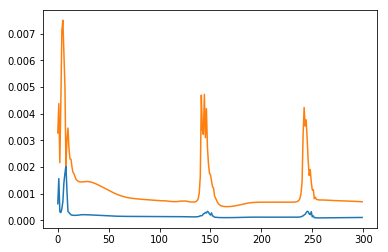

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [14]:
X_test[0]

array([[0.46959459, 0.47412787, 0.47781809],
       [0.46577002, 0.46725457, 0.46336961],
       [0.46800102, 0.47043185, 0.4655337 ],
       [0.46169046, 0.46556867, 0.45900961],
       [0.46717236, 0.46751394, 0.46235122],
       [0.46755482, 0.46783815, 0.46807969],
       [0.47176186, 0.47596875, 0.46935268]])

In [20]:
y_test.reshape(-1,1).shape

(251, 1)

In [28]:
Xt = model.predict(X_test)

In [29]:
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))


ValueError: non-broadcastable output operand with shape (251,1) doesn't match the broadcast shape (251,3)

In [ ]:
plt.plot(scl.inverse_transform(Xt))

In [147]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,3))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[237.01706]], actual:[[231.44]]


In [148]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

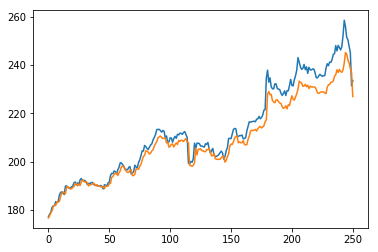

In [149]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [150]:
X_test[249]

array([[0.96003315, 0.94248476, 0.96836611],
       [1.        , 0.98327065, 1.        ],
       [0.98329934, 1.        , 0.99726306],
       [0.95480622, 0.97043185, 0.97403093],
       [0.94817695, 0.95869537, 0.95773662],
       [0.93185875, 0.93651602, 0.93838712],
       [0.91420194, 0.92808974, 0.92985806]])

In [151]:
X_test[248]

array([[0.93026517, 0.93697316, 0.92852142],
       [0.96003315, 0.94248476, 0.96836611],
       [1.        , 0.98327065, 1.        ],
       [0.98329934, 1.        , 0.99726306],
       [0.95480622, 0.97043185, 0.97403093],
       [0.94817695, 0.95869537, 0.95773662],
       [0.93185875, 0.93651602, 0.93838712]])